#### **DU Jack - SIA**

# TP: Machine Learning (SIA_3611)

## TP1: Clustering (4h) 

In machine learning, clustering is related to unsupervised learning approaches in which the algorithm fits from the distribution of given data. The main advantage of such methods is detection without a priori of patterns, sorting data and detecting outliers.

The given dataset is a combination of a dataset produced by the World Health Organization and the location of countries. It pooled the evolution of 23 features for 15 years among numerous countries. One of the goals of this TP1 is to detect continents and subcontinents.

**Objectives:**
- Visualize spatial datasets
- Apply K-Means and GMM on spatial datasets
- Normalize the datasets
- Propose a methodology to detect specific pools of data
- Evaluate the computed clustering


## STEP 1: Spatial datasets and first clusters



The first step is visualizing the mercator projection.

**TO DO 1.1**

Execute the following cells

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

df = pd.read_csv("data/Life_Expectancy_Data.csv")
#df = df.dropna()
df.info()

df1 = df[(df.Year == 2013)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Longitude                        2938 non-null   float64
 2   Latitude                         2938 non-null   float64
 3   Continent                        2938 non-null   object 
 4   Year                             2938 non-null   int64  
 5   Status                           2938 non-null   object 
 6   Life_expectancy                  2928 non-null   float64
 7   Adult_mortality                  2928 non-null   float64
 8   Infant_deaths                    2938 non-null   int64  
 9   Alcohol                          2744 non-null   float64
 10  Percentage_expenditure           2938 non-null   float64
 11  Hepatitis_B                      2385 non-null   float64
 12  Measles             

<module 'matplotlib.pyplot' from 'c:\\Users\\jack0\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

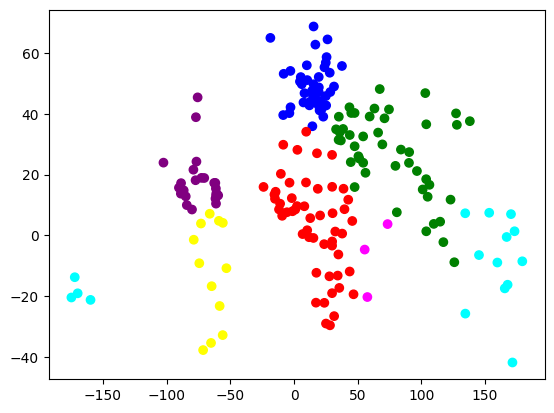

In [3]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt

**QUESTION 1**

- *Identify each class with the plot colors.* <br>
Each class correspond to a region of the world (continent).

- *What do the coordinates correspond to?* <br>
The coordinates correspond to the coordinate of each country on the eurocentric projection map of the world.

**TO DO 1.2**

Execute the following cell


c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\

<module 'matplotlib.pyplot' from 'c:\\Users\\jack0\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

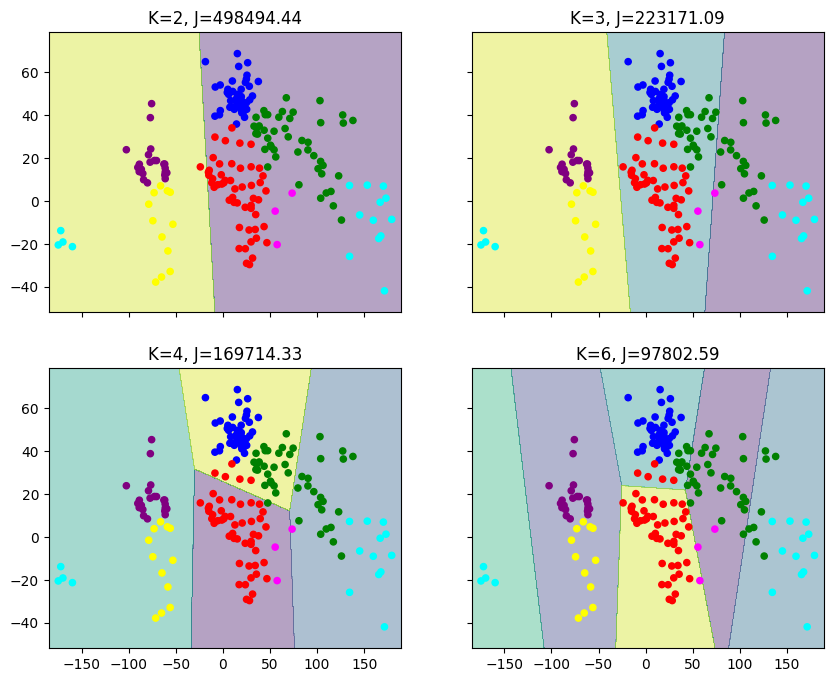

In [4]:
from itertools import product
from sklearn import cluster

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1)
km3 = cluster.KMeans(n_clusters=3).fit(np1)
km4 = cluster.KMeans(n_clusters=4).fit(np1)
km6 = cluster.KMeans(n_clusters=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_, 
                         "K=4, J=%.2f" % km4.inertia_, 
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt     

**QUESTION 2**

*How can Inertia be used to compare clusters? Can you propose a better metric for spatial datasets?*

*Which is the main problem with the mercator representation for continent detection?*

Inertia can be used to compare clusters as it gives indication on the quality of the clusters we have, as it returns **good results (lower inertia)** if distances between points and centroid are short. <br>
There are other metrics that exists and give better indication for spatial datasets such as **DBScan algorithm**.

The main problem with the mercator representation for continent detection is that it is really **dependant of the distances with the centroid** and it is **sensible to distorsion**. Continent does not have exact dimension and this can be an issue to represent clusters.
And even more obvious, the mercator representation has an obvious issue: **oceania is separated** on both side of the map, it can't represent the spherical state of the world.

## STEP 2: Spatial dataset normalization

**TO CODE 2.1**

Displace the origin of longitude to 30° east.

C:\Users\jack0\AppData\Local\Temp\ipykernel_15636\1701154483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X['Longitude'] = (df_X['Longitude'] - 30 - 180) % 360 - 180


<module 'matplotlib.pyplot' from 'c:\\Users\\jack0\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

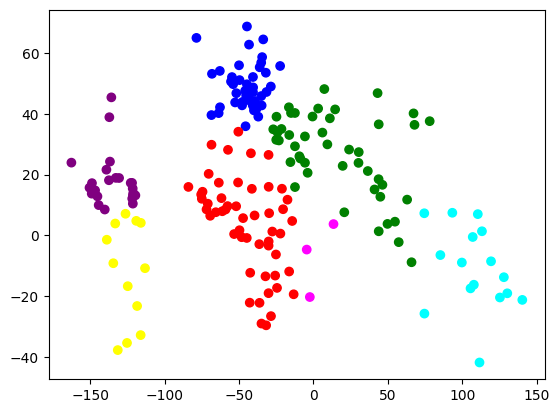

In [5]:
df_X = df1[['Longitude', 'Latitude']]
df_X['Longitude'] = (df_X['Longitude'] - 30 - 180) % 360 - 180
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))



np1 = df_X.to_numpy()
np1[:,0] = np1[:,0] - 30
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt

**QUESTION 3**

*What are the advantages of this normalization?*

This normalization gathers all the points of Oceania on one side only on the map. It resolves the most obvious issue we had with the precedent representation (creating 2 clusters for 1 same continent).

**TO CODE 2.2**

Apply KMeans to the new normalized dataset.

c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

<module 'matplotlib.pyplot' from 'c:\\Users\\jack0\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

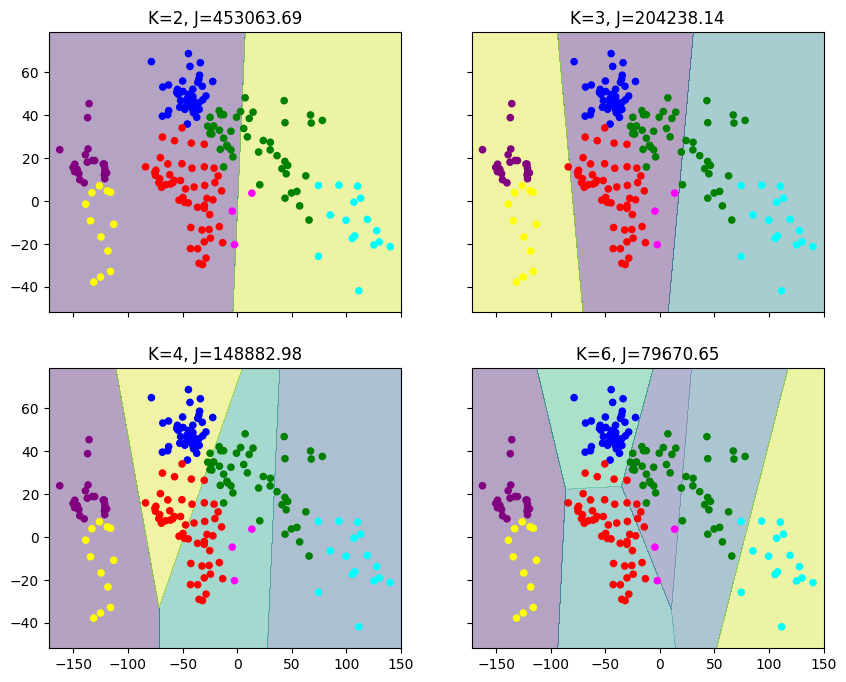

In [6]:
from itertools import product
from sklearn import cluster

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1)
km3 = cluster.KMeans(n_clusters=3).fit(np1)
km4 = cluster.KMeans(n_clusters=4).fit(np1)
km6 = cluster.KMeans(n_clusters=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_, 
                         "K=4, J=%.2f" % km4.inertia_, 
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt     

Results are not relevant enough. Even with K=6, we still **don't have a decent representation due to having straight boundaries**.

<br> 

**Solution:**
Gaussian Mixture Model is a clustering method allowing soft boundaries.

This method can be used through a [sklearn function](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html "Gaussian Mixture")

**TO CODE 2.3**

Apply GMM to the normalized dataset.

You have to test 3 conditions:

- GMM with default parameters for 2, 3, 4 and 6 components

- GMM with diagonal covariance matrix for 2, 3, 4 and 6 components

- GMM with random initialization for 2, 3, 4 and 6 components

<module 'matplotlib.pyplot' from 'c:\\Users\\jack0\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

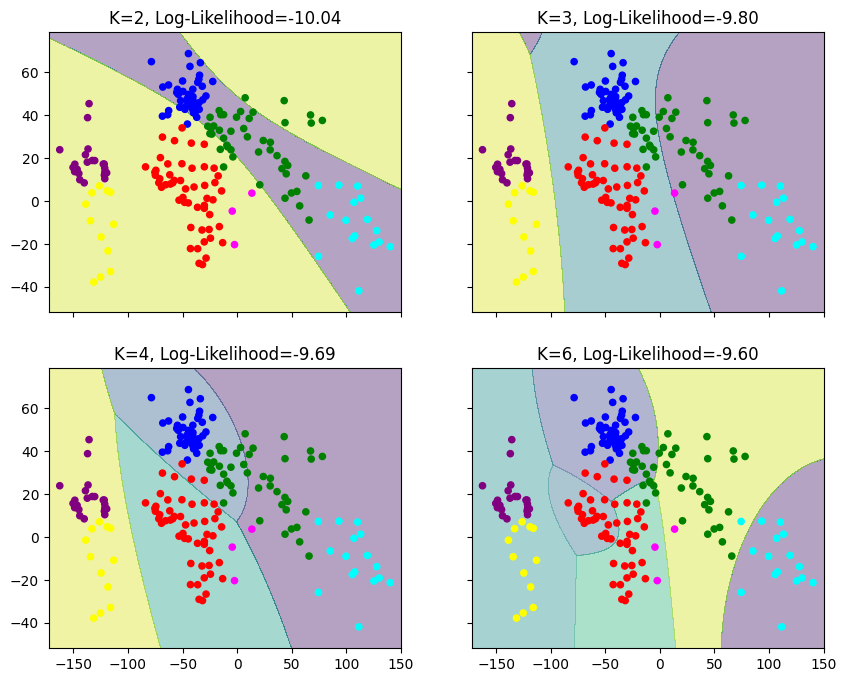

In [7]:
import numpy as np
from sklearn.mixture import GaussianMixture
from itertools import product

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

gm2 = GaussianMixture(n_components=2, random_state=0).fit(np1)
gm3 = GaussianMixture(n_components=3, random_state=0).fit(np1)
gm4 = GaussianMixture(n_components=4, random_state=0).fit(np1)
gm6 = GaussianMixture(n_components=6, random_state=0).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gm, tt in zip(product([0, 1], [0, 1]),
                        [gm2, gm3, gm4, gm6],
                        ["K=2, Log-Likelihood=%.2f" % gm2.score(np1),
                         "K=3, Log-Likelihood=%.2f" % gm3.score(np1),
                         "K=4, Log-Likelihood=%.2f" % gm4.score(np1),
                         "K=6, Log-Likelihood=%.2f" % gm6.score(np1)]):

    Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt     

<module 'matplotlib.pyplot' from 'c:\\Users\\jack0\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

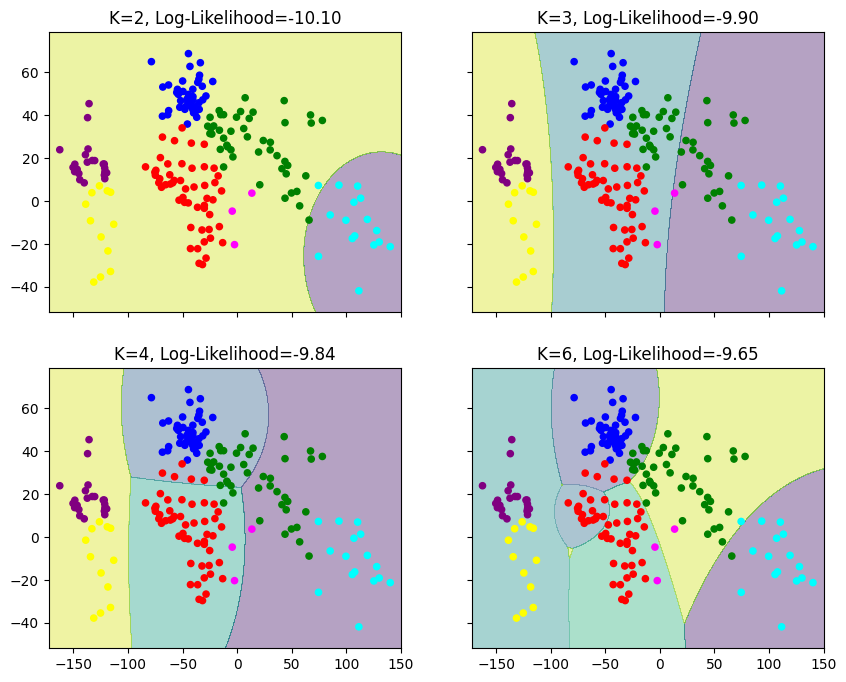

In [113]:
import numpy as np
from sklearn.mixture import GaussianMixture
from itertools import product

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

gm2 = GaussianMixture(n_components=2, random_state=0, covariance_type='diag').fit(np1)
gm3 = GaussianMixture(n_components=3, random_state=0, covariance_type='diag').fit(np1)
gm4 = GaussianMixture(n_components=4, random_state=0, covariance_type='diag').fit(np1)
gm6 = GaussianMixture(n_components=6, random_state=0, covariance_type='diag').fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gm, tt in zip(product([0, 1], [0, 1]),
                        [gm2, gm3, gm4, gm6],
                        ["K=2, Log-Likelihood=%.2f" % gm2.score(np1),
                         "K=3, Log-Likelihood=%.2f" % gm3.score(np1),
                         "K=4, Log-Likelihood=%.2f" % gm4.score(np1),
                         "K=6, Log-Likelihood=%.2f" % gm6.score(np1)]):

    Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt

<module 'matplotlib.pyplot' from 'c:\\Users\\jack0\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

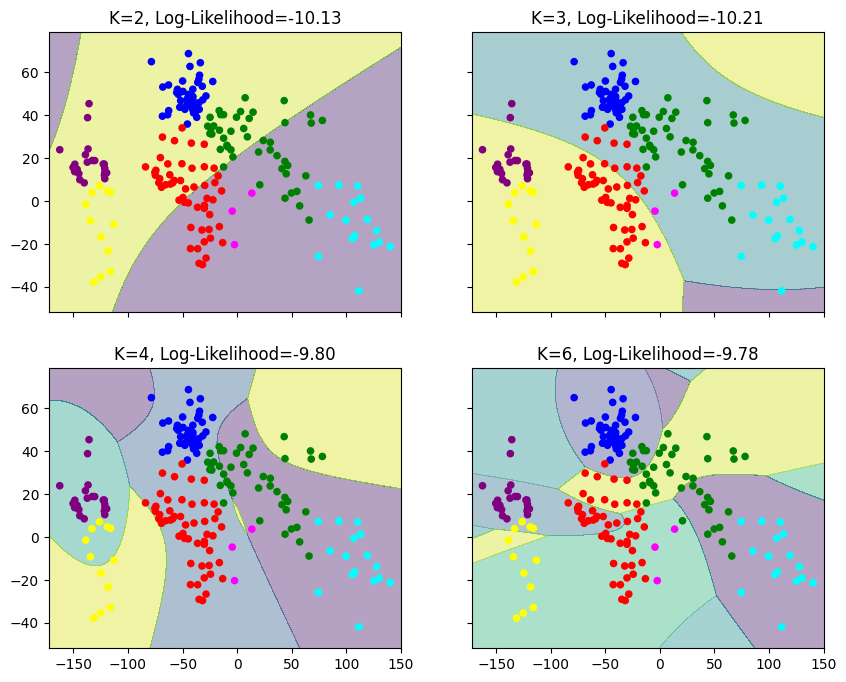

In [114]:
import numpy as np
from sklearn.mixture import GaussianMixture
from itertools import product
from sklearn import cluster

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

gm2 = GaussianMixture(n_components=2, random_state=0, init_params= 'random').fit(np1)
gm3 = GaussianMixture(n_components=3, random_state=0, init_params= 'random').fit(np1)
gm4 = GaussianMixture(n_components=4, random_state=0, init_params= 'random').fit(np1)
gm6 = GaussianMixture(n_components=6, random_state=0, init_params= 'random').fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gm, tt in zip(product([0, 1], [0, 1]),
                        [gm2, gm3, gm4, gm6],
                        ["K=2, Log-Likelihood=%.2f" % gm2.score(np1),
                         "K=3, Log-Likelihood=%.2f" % gm3.score(np1),
                         "K=4, Log-Likelihood=%.2f" % gm4.score(np1),
                         "K=6, Log-Likelihood=%.2f" % gm6.score(np1)]):

    Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt

**QUESTION 4**

*Which is the best method to detect continents?* <br>
*For this method, what would be the probability to find a country in the coordinates [-50, -40]? What methodology can you think of to detect unpopulated oceans?*

The best method to detect continents would be **Gaussian Mixture with diagonal covariance matrix**. GMM is much more flexible because it allows for clusters with different shapes and sizes. By using diagonal or full covariance matrices, GMM can capture elongated or irregular clusters that **better fit the shapes** of real-world geographical regions, like continents.

GMM with diagonal covariance matrix is a good choice when the clusters (continents) might be somewhat elliptical but not too irregular. However, if the data requires a more complex covariance structure, you may want to use a full covariance matrix for GMM.

In [8]:
gmm = GaussianMixture(n_components=5, covariance_type='diag')
gmm.fit(df_X)

# Coordinates to check: [-50, -40]
coordinates = np.array([[-50, -40]])

# Get probability density for the given coordinates
prob_density = np.exp(gmm.score_samples(coordinates))
print(f"Probability of finding a country at coordinates [-50, -40]: {prob_density}")

Probability of finding a country at coordinates [-50, -40]: [7.17245763e-07]


c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


In the end, it shows that detecting such contry in an unpopulated oceans is not really working well. It returns such small probability that is not really relevant enough.

**BONUS**

Rather than applying the previous longitudinal normalization in the mercator projected data and applying k-means, we could directly apply k-means on the unit-sphere representing the earth. The cosine similarity thus becomes a more suitable similarity measure than the euclidean distance.

Apply a KMeans with cosine similarity on the sphere instead of the previously tested euclidean distance in the plane.

c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

<module 'matplotlib.pyplot' from 'c:\\Users\\jack0\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

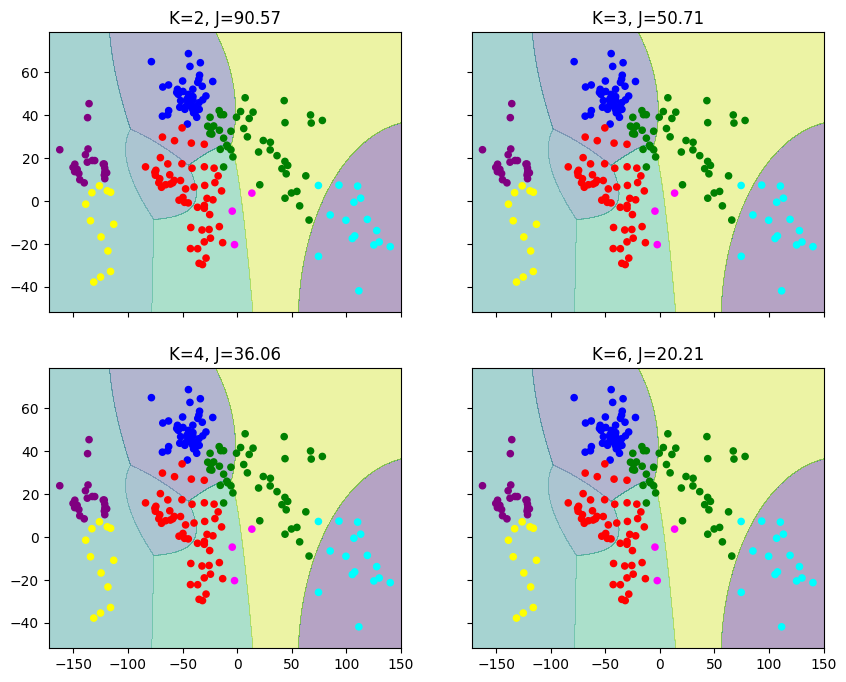

In [10]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# First, we have to convert latitude and longitude (df_X) to 3D Cartesian coordinates (unit sphere)
def latlon_to_cartesian(lat, lon):
    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)
    
    x = np.cos(lat_rad) * np.cos(lon_rad)
    y = np.cos(lat_rad) * np.sin(lon_rad)
    z = np.sin(lat_rad)
    
    return np.array([x, y, z]).T

coords_3d = latlon_to_cartesian(df_X['Latitude'].values, df_X['Longitude'].values)

# Apply K-Means algorithm using cosine similarity
norm_coords = coords_3d / np.linalg.norm(coords_3d, axis=1).reshape(-1, 1)  # Normalize each point to unit length

# K-Means with normalized 3D coordinates
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(norm_coords)


km2 = KMeans(n_clusters=2, random_state=10).fit(norm_coords)
km3 = KMeans(n_clusters=3, random_state=10).fit(norm_coords)
km4 = KMeans(n_clusters=4, random_state=10).fit(norm_coords)
km6 = KMeans(n_clusters=6, random_state=10).fit(norm_coords)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_, 
                         "K=4, J=%.2f" % km4.inertia_, 
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt

## STEP 3: Detection of caribbean island 

**TO CODE 3.1**

Isolate the North and South American continents.

In [11]:
df2 = df1[(df1.Continent == 'North America') | (df1.Continent == 'South America') ]

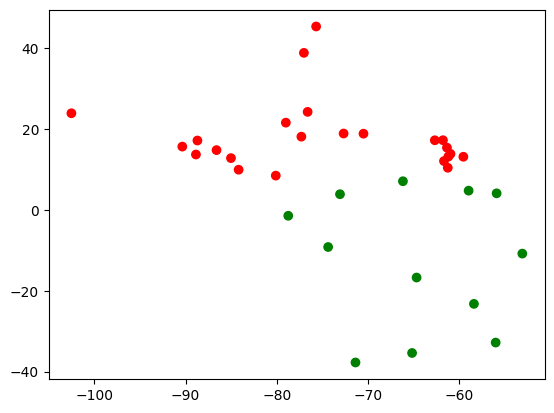

In [12]:
df_X = df2[['Longitude', 'Latitude']]
df_Status = df2[['Continent']]

df_Y = df_Status.replace(['North America', 'South America'], [3, 4])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt.show()


**TO CODE 3.2**

Propose a methodology to create a cluster including caribbean independent nations.

The goal is to purpose a methodology to create a cluster including Carribean independant nations. The Caribbean region has geographical coherence, and we can use clustering to automatically detect and group these nations based on their longitude and latitude data. To do that, we inspire from above and do:
- Preprocessing Data: extract the longitude and latitude data.
- Fit a Gaussian Mixture Model (GMM)
- Plot and analyse clusters (check the relevance of the cluster related to Caribbean nations)

<module 'matplotlib.pyplot' from 'c:\\Users\\jack0\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

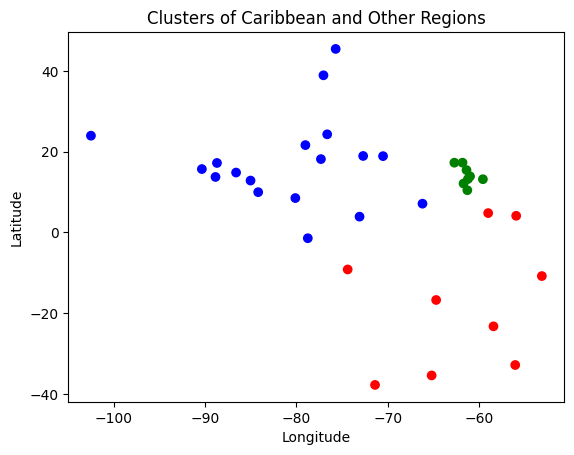

In [13]:
# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, covariance_type='diag', random_state=10).fit(df_X)

# Predict the cluster for each point
clusters = gmm.predict(df_X)

# Visualization of the clusters
np1 = df_X.to_numpy()
np1[:,0] = np1[:,0]
plt.scatter(np1[:,0], np1[:,1], c=clusters, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue']))
plt.title('Clusters of Caribbean and Other Regions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt

<module 'matplotlib.pyplot' from 'c:\\Users\\jack0\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

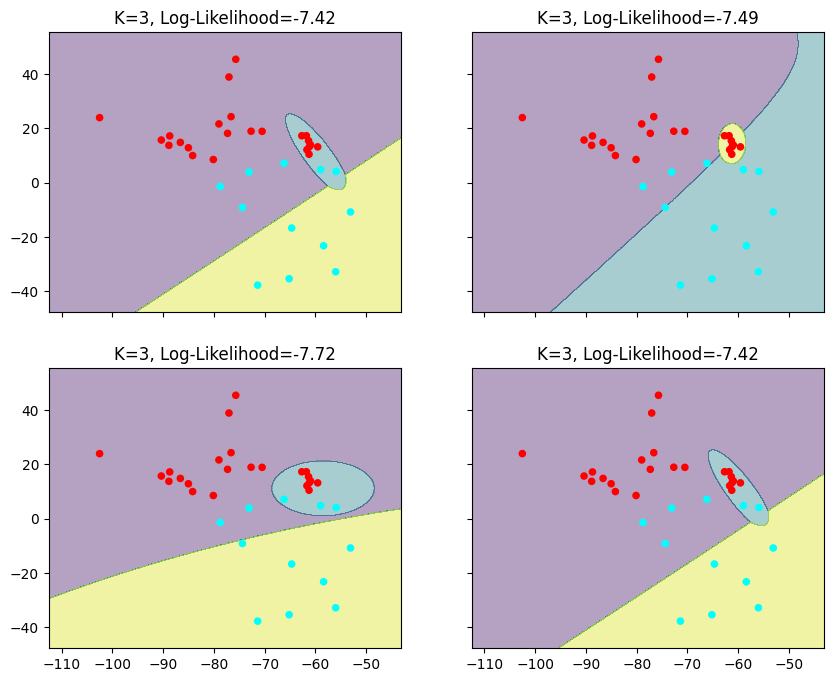

In [120]:
x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

gm2 = GaussianMixture(n_components=3, random_state = 2, covariance_type='full').fit(np1)
gm3 = GaussianMixture(n_components=3, random_state=3, init_params = 'kmeans', covariance_type='diag').fit(np1)
gm4 = GaussianMixture(n_components=3, random_state=5, init_params = 'kmeans', covariance_type='spherical').fit(np1)
gm6 = GaussianMixture(n_components=3, random_state=5, init_params = 'kmeans', covariance_type='full').fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gm, tt in zip(product([0, 1], [0, 1]),
                        [gm2, gm3, gm4, gm6],
                        ["K=3, Log-Likelihood=%.2f" % gm2.score(np1),
                         "K=3, Log-Likelihood=%.2f" % gm3.score(np1),
                         "K=3, Log-Likelihood=%.2f" % gm4.score(np1),
                         "K=3, Log-Likelihood=%.2f" % gm6.score(np1)]):

    Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt

**QUESTION 5**

*Which is the outlier of this clustering problem?*

There's a cluster that weights the centroid and makes recognition of the whole Carribbean region more difficult. However, we got part of the countries of the Carribean region.

## STEP 4 : Evaluating a cluster

In this section, we try to evaluate the quality of the different clusters computed.

**TO DO 4.1**
Execute the following cells. On the first cell, you can add code to once again displace the longitude by 30° east.

C:\Users\jack0\AppData\Local\Temp\ipykernel_15636\3892423139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X['Longitude'] = (df_X['Longitude'] - 30 - 180) % 360 - 180


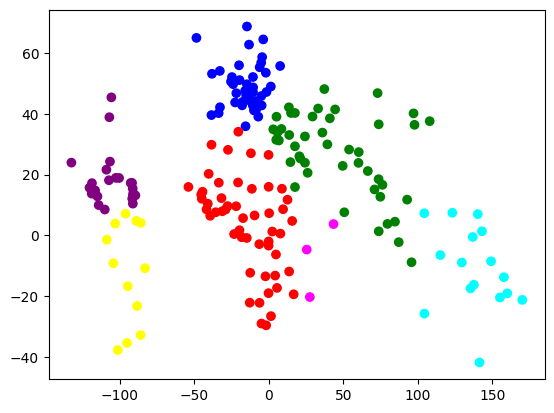

In [19]:
df_X = df1[['Longitude', 'Latitude']]
df_X['Longitude'] = (df_X['Longitude'] - 30 - 180) % 360 - 180
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.show()

In [20]:
x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.5606777583656894


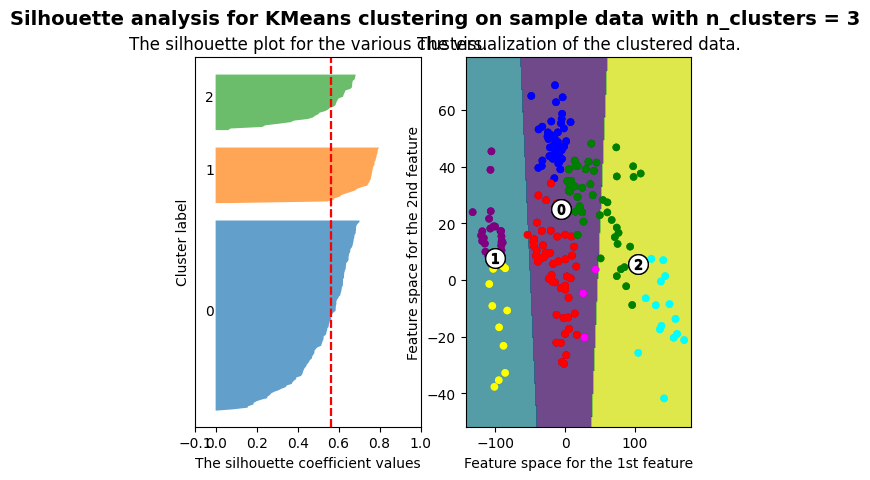

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 3

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1) + (K + 1) * 10])

km = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km.fit_predict(np1)

silhouette_avg = silhouette_score(np1, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km.predict(np.c_[xx.ravel(), yy .ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**TO DO 4.2**

Apply the previous code for different values of K (2,3,4 and 6).

c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.5138751158850031


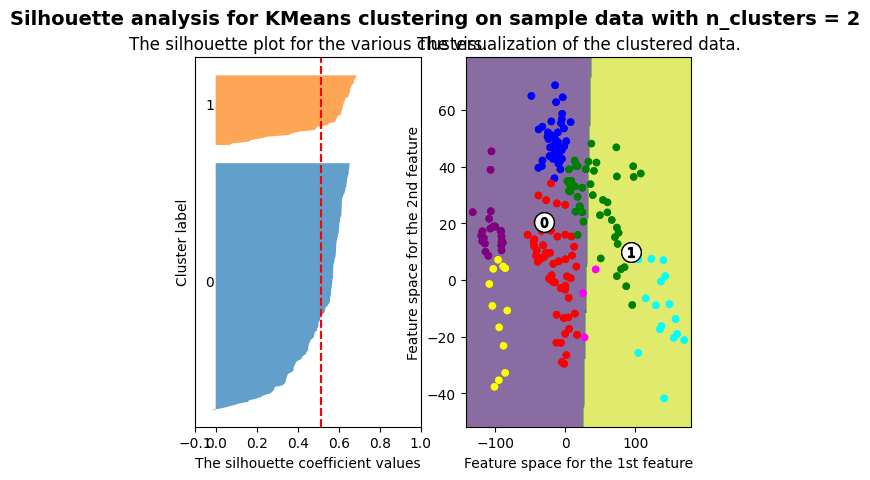

c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.5606777583656894


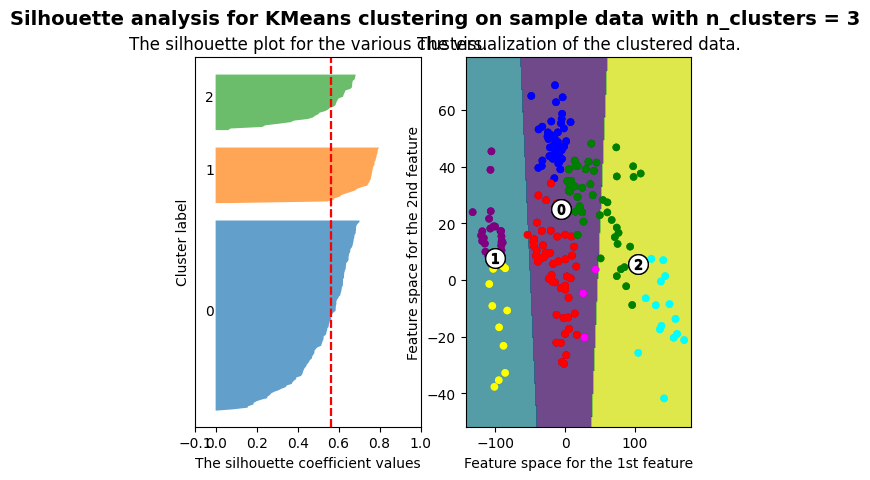

c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.44464926591415543


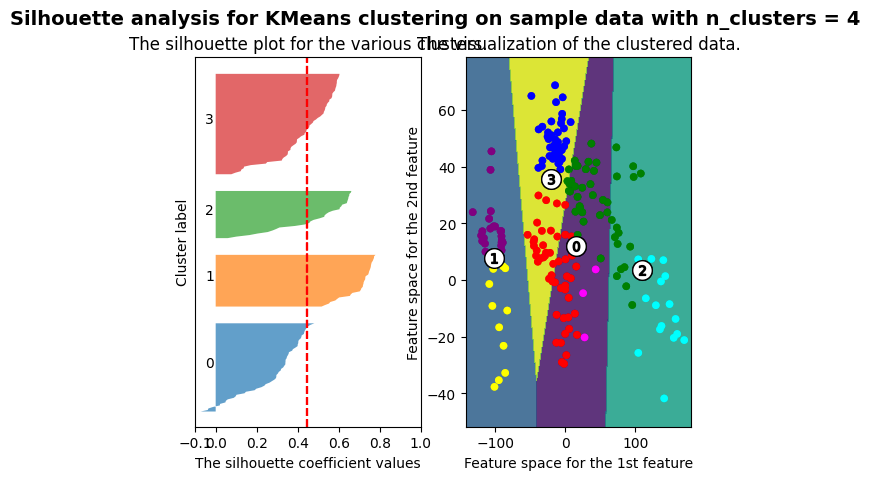

c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.4883035076641583


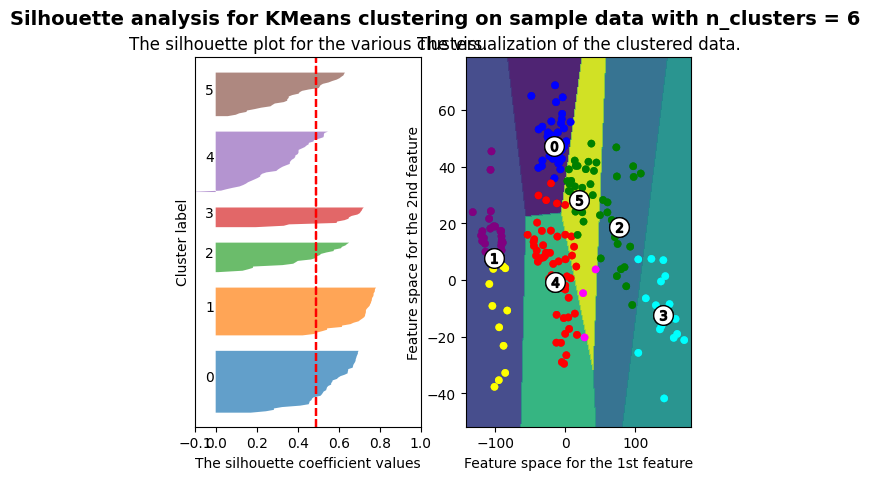

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score

K_values = [2,3,4,6]

for K in K_values:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(np1) + (K + 1) * 10])

    km = cluster.KMeans(n_clusters=K, random_state=10)
    cluster_labels = km.fit_predict(np1)

    silhouette_avg = silhouette_score(np1, cluster_labels)
    print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(np1, cluster_labels)

    y_lower = 10
    for i in range(K):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax2.contourf(xx, yy, Z, alpha=0.4)
        ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                    s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

        # Labeling the clusters
        centers = km.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % K,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

**Question 6** 

According to the silhouette score and the silhouette analysis, which is the most relevant value of K ? Justify your response.

Silhouette score is maximum with **K=3**. 
The silhouette score measures how similar each data point is to its own cluster (cohesion) compared to other clusters (separation). <br>
The score ranges from -1 to 1, where:
- 1 indicates the data point is perfectly matched to its own cluster and poorly matched to neighboring clusters.
- 0 indicates the data point is on or very close to the boundary between two clusters.
- **Negative values** suggest that the data point is assigned to the wrong cluster.

Since **K = 3** gives the highest silhouette score, it suggests that the data is best represented by **three distinct clusters**. The score indicates a **good balance** between cohesion within clusters and separation between them, making K=3 the most appropriate choice for this dataset.
However, it does not really correspond to a continent, but more like best representation of regions clusters based on geographic distances.

**BONUS** 

Compute the silhouette score and analyze it for different number of components and parameters of Gaussian Mixture.

For n_components = 2, the average silhouette_score is : 0.4453885647092114


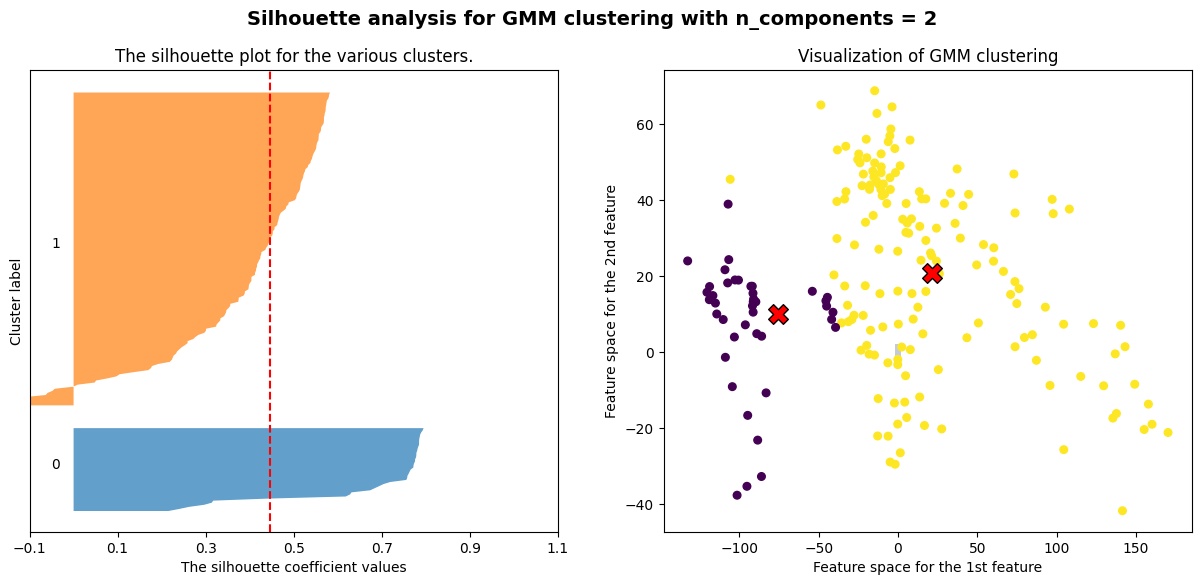

For n_components = 3, the average silhouette_score is : 0.5415299502146015


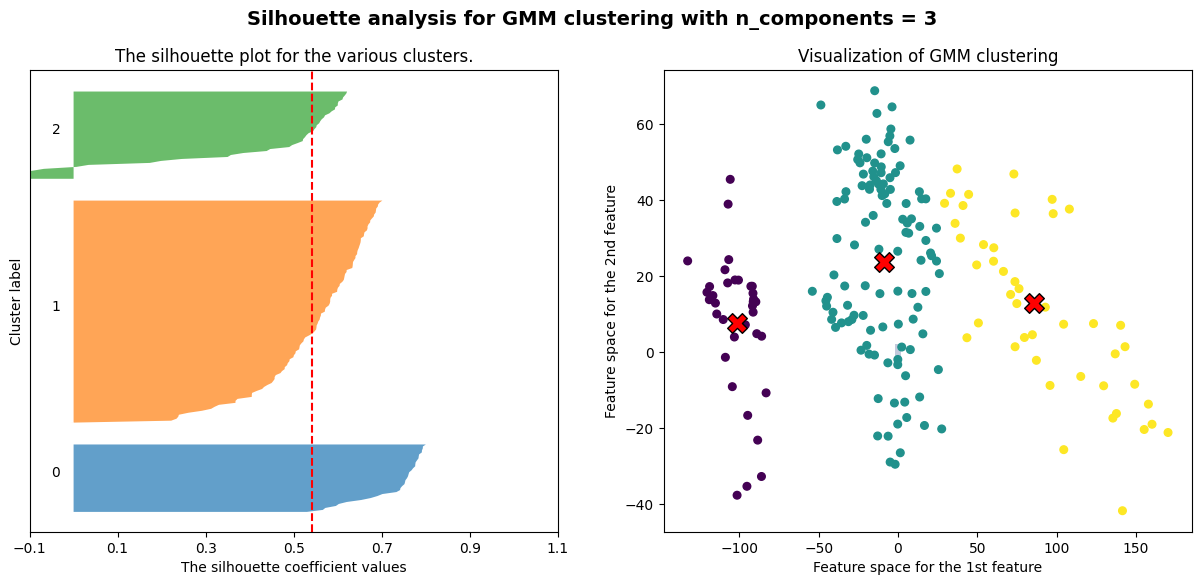

For n_components = 4, the average silhouette_score is : 0.4049340211612738


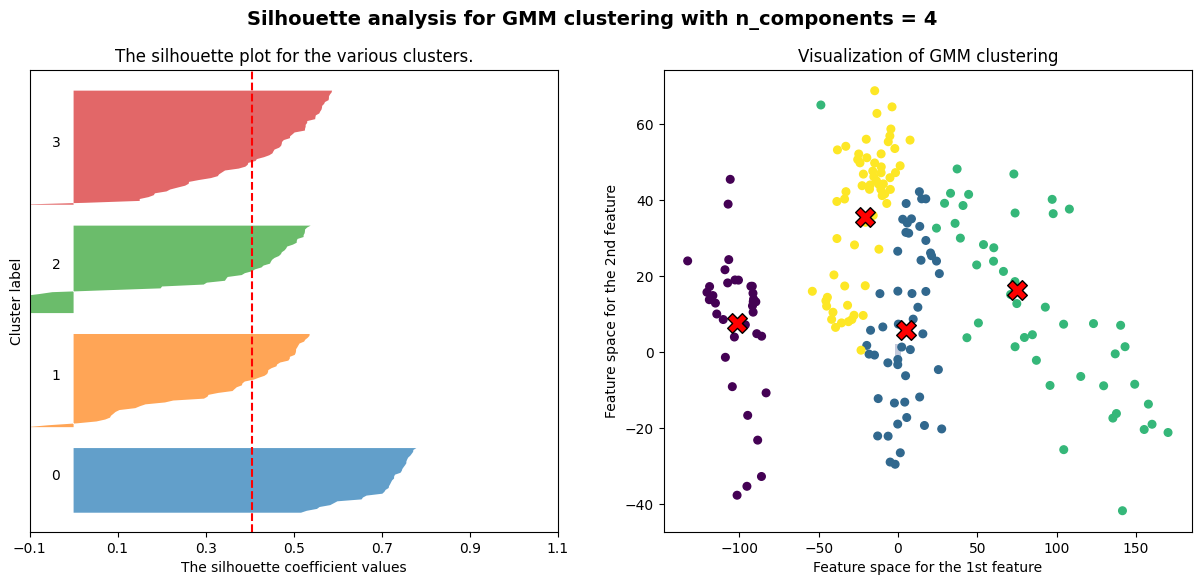

For n_components = 6, the average silhouette_score is : 0.4728188817552066


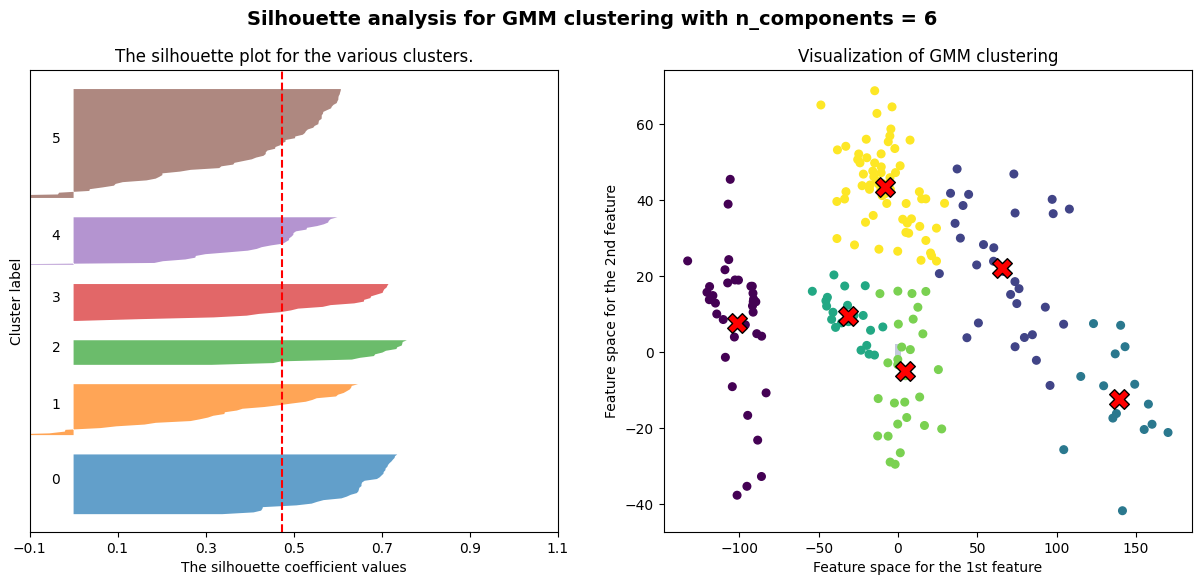

In [23]:
# Define the range of clusters (number of components)
K_values = [2, 3, 4, 6]

for K in K_values:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(np1) + (K + 1) * 10])

    # Apply Gaussian Mixture for different numbers of components
    gmm = GaussianMixture(n_components=K, random_state=42)
    cluster_labels = gmm.fit_predict(np1)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(np1, cluster_labels)
    print(f"For n_components = {K}, the average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(np1, cluster_labels)

    # Silhouette Plot
    y_lower = 10
    for i in range(K):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    # Silhouette plot details
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels/ticks
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

    # Visualization of clustered data in a 2D feature space
    xx, yy = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.3)
    ax2.scatter(np1[:, 0], np1[:, 1], c=cluster_labels, s=30, cmap='viridis')

    centers = gmm.means_
    ax2.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', edgecolor='k')

    ax2.set_title("Visualization of GMM clustering")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(f"Silhouette analysis for GMM clustering with n_components = {K}", fontsize=14, fontweight='bold')

    plt.show()


The results have the same output as **K = 3** gives the highest silhouette score. It suggests that the data is best represented by **three distinct clusters**. The score indicates a **good balance** between cohesion within clusters and separation between them, making K=3 the most appropriate choice for this dataset.
However, it does not really correspond to a continent, but more like best representation of regions clusters based on geographic distances.

**TO CODE 4.3**

Another way to evaluate the quality of the clustering is through the homogeneity. This metric require a ground truth, so it can't be computed for every clustering problem. Luckily, we do have a ground truth here. Compute the [homogeneity score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html "Homogeneity score") for different values of K.

In [67]:
from sklearn.metrics import homogeneity_score

K_values = [2, 3, 4, 6]

for K in K_values:
    km = cluster.KMeans(n_clusters=K, random_state=10)
    cluster_labels = km.fit_predict(np1)

    homogeneity = homogeneity_score(np_Y, cluster_labels)
    print(f"For n_clusters = {K}, the homogeneity score is: {homogeneity:.2f}")

For n_clusters = 2, the homogeneity score is: 0.21
For n_clusters = 3, the homogeneity score is: 0.42
For n_clusters = 4, the homogeneity score is: 0.56
For n_clusters = 6, the homogeneity score is: 0.80


c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

**Question 7**

According to the homogeneity score, which is the most relevant value of K ?

The homogeneity is maximum for **K=6**. homogeneity score is a metric used to evaluate the quality of clustering algorithms. It measures how homogeneous the clusters are, meaning **how much each cluster contains only data points from a single class or label**. It is consistent to see that homogeinity score is the best for K=6 as there are 6 different labels.

**BONUS**
Compute the homogeneity score and analyze it for different number of components and parameters of Gaussian Mixture.

In [129]:
K_values = [2, 3, 4, 6]

for K in K_values:
    gmm = GaussianMixture(n_components=K, random_state=10)
    cluster_labels = gmm.fit_predict(np1)

    homogeneity = homogeneity_score(np_Y, cluster_labels)
    print(f"For n_component = {K}, the homogeneity score is: {homogeneity:.2f}")


For n_component = 2, the homogeneity score is: 0.23
For n_component = 3, the homogeneity score is: 0.46
For n_component = 4, the homogeneity score is: 0.58
For n_component = 6, the homogeneity score is: 0.79


The results are the same. Homogeneity is maximum for **K=6**. homogeneity score is a metric used to evaluate the quality of clustering algorithms. It measures how homogeneous the clusters are, meaning **how much each cluster contains only data points from a single class or label**. It is consistent to see that homogeinity score is the best for K=6 as there are 6 different labels.

## BONUS STEP 5: Alcoholism

This step is entirely optional and combines all the methods you used for this 1 TPs course.

The main goal is to develop a complete methodology to answer general questions.

All questions have to be justified by your homemade methodology and your methodology has also to be justified.

**QUESTION 1**

In the year 2000, which countries are heavily concerned by an Alcohol issue?

In [28]:
df3 = df[(df.Year == 2000)]
df3_sorted = df3.sort_values(by='Alcohol', ascending=False)
df3_sorted.head(20)

,Country,Longitude,Latitude,Continent,Year,Status,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness _1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
1265,Ireland,-8.137936,53.175449,Europe,2000,Developed,76.4,94.0,0,14.07,...,86.0,6.30,86.0,0.1,26241.91883,385174.0,0.3,0.3,0.848,16.2
945,France,-2.761729,42.173440,Europe,2000,Developing,78.8,13.0,3,13.63,...,98.0,9.77,97.0,0.1,22465.64184,6912498.0,0.7,0.6,0.844,15.7
704,Czechia,15.312402,49.733412,Europe,2000,Developed,74.7,126.0,0,13.22,...,98.0,6.31,98.0,0.1,NaN,NaN,2.3,2.3,NaN,NaN
143,Austria,14.126476,47.585494,Europe,2000,Developed,78.1,96.0,0,13.20,...,71.0,1.60,81.0,0.1,24517.26745,811566.0,1.7,1.9,0.833,15.4
1553,Luxembourg,6.071822,49.767254,Europe,2000,Developed,77.8,98.0,0,13.14,...,99.0,7.48,99.0,0.1,48735.99549,4363.0,1.0,1.0,0.848,13.5
239,Belarus,28.032093,53.531314,Europe,2000,Developing,68.0,247.0,1,12.98,...,99.0,6.13,99.0,0.1,1276.28834,997961.0,2.7,2.8,0.675,13.1
1009,Germany,10.385781,51.106982,Europe,2000,Developed,78.0,95.0,3,12.91,...,94.0,1.10,9.0,0.1,23718.74670,8221158.0,1.2,1.2,0.855,16.2
656,Croatia,16.404129,45.080476,Europe,2000,Developed,74.7,127.0,0,12.73,...,94.0,7.66,93.0,0.1,4919.62869,4426.0,2.1,2.1,0.739,12.2
1169,Hungary,19.395591,47.162775,Europe,2000,Developed,71.7,193.0,1,12.22,...,99.0,7.60,99.0,0.1,4623.46712,121971.0,2.3,2.3,0.761,13.9
175,Bahamas,-76.628430,24.290367,North America,2000,Developing,72.6,192.0,0,12.15,...,91.0,5.21,99.0,0.1,NaN,NaN,2.7,2.6,0.000,12.0


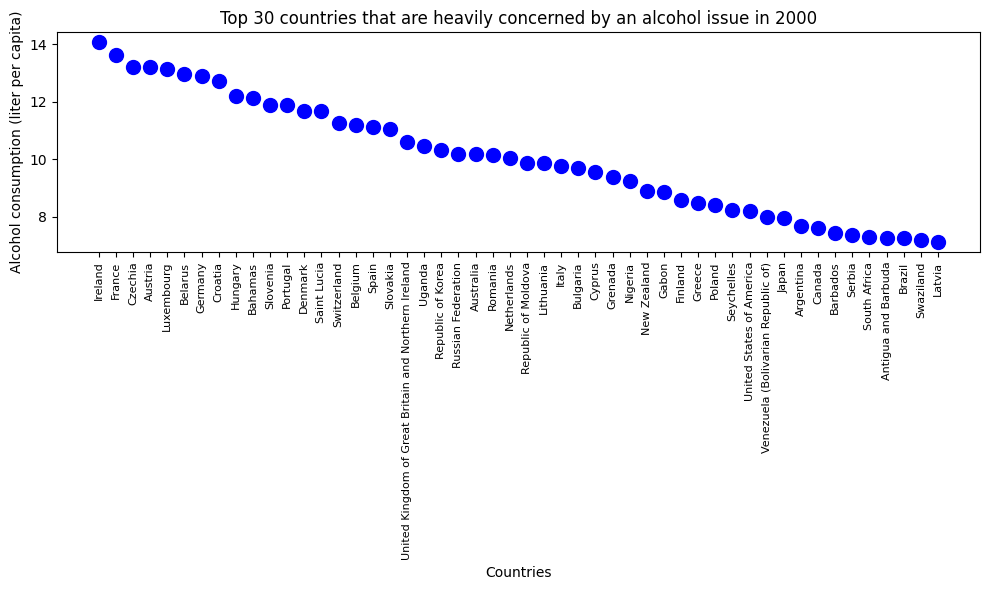

In [29]:
# Retrieve relevant data
df3 = df[df['Year'] == 2000]
df3_sorted = df3.sort_values(by='Alcohol', ascending=False)

# Select the top 50 countries
top_50_countries = df3_sorted.head(50)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(top_50_countries['Country'], top_50_countries['Alcohol'], color='blue', s=100)
plt.title('Top 30 countries that are heavily concerned by an alcohol issue in 2000')
plt.xlabel('Countries')
plt.ylabel('Alcohol consumption (liter per capita)')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()


c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jack0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

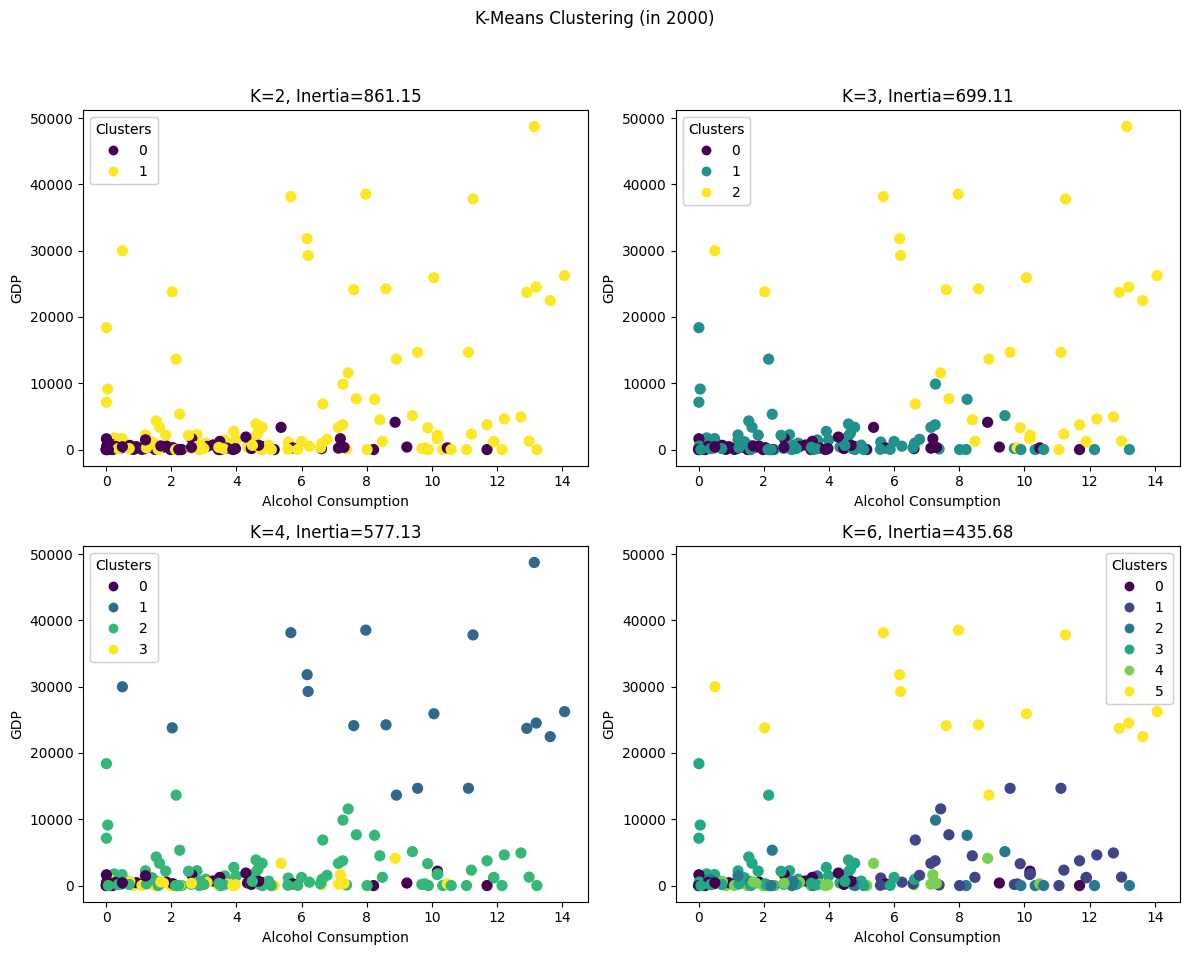

In [30]:
from sklearn.preprocessing import StandardScaler

# Filter for 2000
df_2000 = df[df['Year'] == 2000]

# Select the relevant features
features = df_2000[['Alcohol', 'GDP', 'Life_expectancy', 'Adult_mortality', 'Polio', 'Diphtheria', 'Income_composition_of_resources']].fillna(0)

# Normalization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means with different values of K
km2 = cluster.KMeans(n_clusters=2).fit(features_scaled)
km3 = cluster.KMeans(n_clusters=3).fit(features_scaled)
km4 = cluster.KMeans(n_clusters=4).fit(features_scaled)
km6 = cluster.KMeans(n_clusters=6).fit(features_scaled)

# Plot
f, axarr = plt.subplots(2, 2, figsize=(12, 10))

for idx, km, title in zip(product([0, 1], [0, 1]), [km2, km3, km4, km6],
                          ["K=2, Inertia=%.2f" % km2.inertia_,
                           "K=3, Inertia=%.2f" % km3.inertia_,
                           "K=4, Inertia=%.2f" % km4.inertia_,
                           "K=6, Inertia=%.2f" % km6.inertia_]):

    # Prediction of clusters
    cluster_labels = km.predict(features_scaled)

    # Plot the results
    scatter = axarr[idx[0], idx[1]].scatter(features['Alcohol'], features['GDP'], c=cluster_labels, s=50, cmap='viridis')
    axarr[idx[0], idx[1]].set_title(title)
    axarr[idx[0], idx[1]].set_xlabel("Alcohol Consumption")
    axarr[idx[0], idx[1]].set_ylabel("GDP")
    
    legend = axarr[idx[0], idx[1]].legend(*scatter.legend_elements(), title="Clusters")
    axarr[idx[0], idx[1]].add_artist(legend)

plt.suptitle("K-Means Clustering (in 2000)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


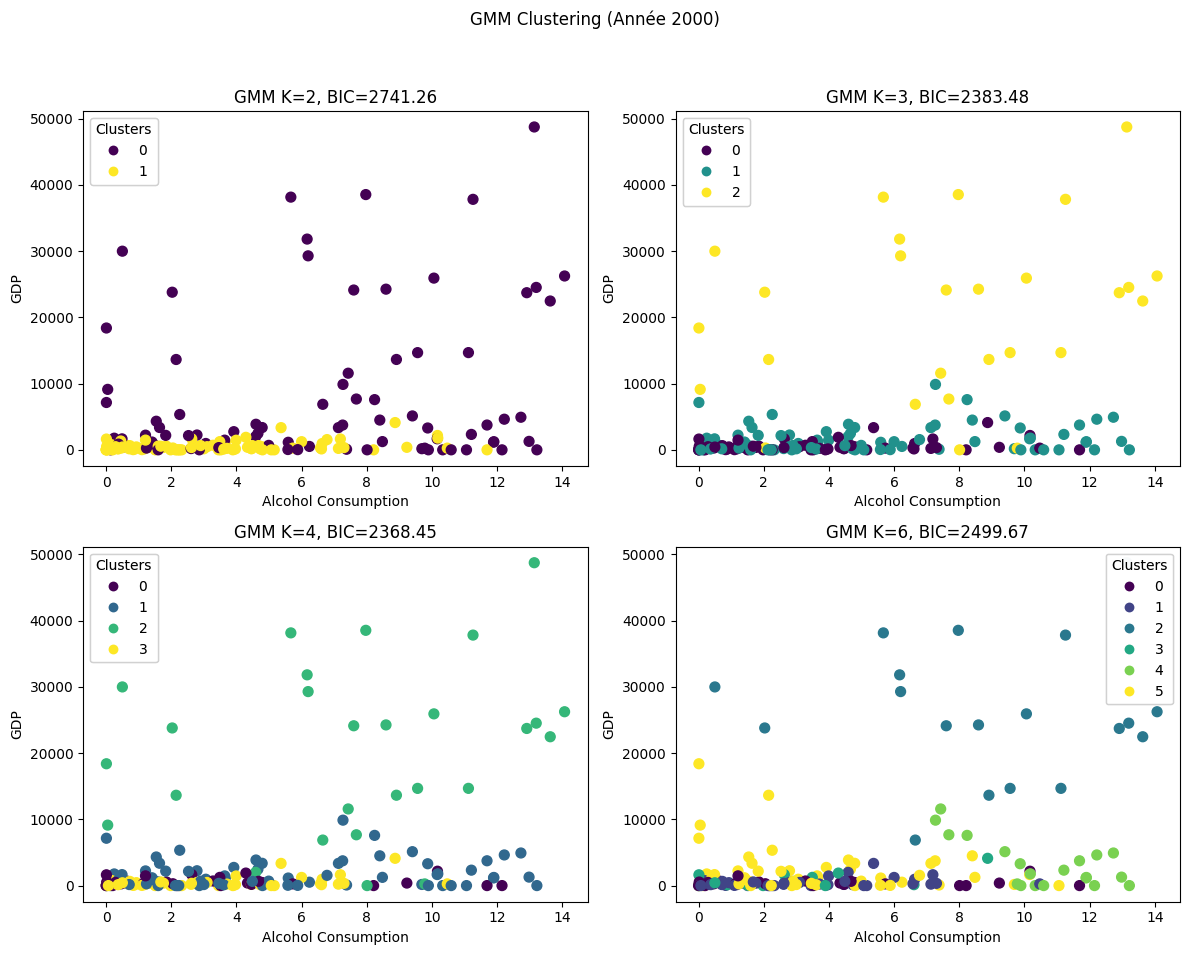

In [31]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from itertools import product
import numpy as np

# Filter for 2000
df_2000 = df[df['Year'] == 2000]

# Select relevant features
features = df_2000[['Alcohol', 'GDP', 'Life_expectancy', 'Adult_mortality', 'Polio', 'Diphtheria', 'Income_composition_of_resources']].fillna(0)

# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply GMM with different values of K
gmm2 = GaussianMixture(n_components=2, random_state=42).fit(features_scaled)
gmm3 = GaussianMixture(n_components=3, random_state=42).fit(features_scaled)
gmm4 = GaussianMixture(n_components=4, random_state=42).fit(features_scaled)
gmm6 = GaussianMixture(n_components=6, random_state=42).fit(features_scaled)

# Plot
f, axarr = plt.subplots(2, 2, figsize=(12, 10))

for idx, gmm, title in zip(product([0, 1], [0, 1]), [gmm2, gmm3, gmm4, gmm6],
                          ["GMM K=2, BIC=%.2f" % gmm2.bic(features_scaled),
                           "GMM K=3, BIC=%.2f" % gmm3.bic(features_scaled),
                           "GMM K=4, BIC=%.2f" % gmm4.bic(features_scaled),
                           "GMM K=6, BIC=%.2f" % gmm6.bic(features_scaled)]):

    # Predict
    cluster_labels = gmm.predict(features_scaled)

    # Plot
    scatter = axarr[idx[0], idx[1]].scatter(features['Alcohol'], features['GDP'], c=cluster_labels, s=50, cmap='viridis')
    axarr[idx[0], idx[1]].set_title(title)
    axarr[idx[0], idx[1]].set_xlabel("Alcohol Consumption")
    axarr[idx[0], idx[1]].set_ylabel("GDP")

    legend = axarr[idx[0], idx[1]].legend(*scatter.legend_elements(), title="Clusters")
    axarr[idx[0], idx[1]].add_artist(legend)

plt.suptitle("GMM Clustering (Année 2000)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [40]:
# Predict with GMM
cluster_labels = gmm4.predict(features_scaled)

# Identify countries in the cluster with the highest alcohol consumption
high_alcohol_cluster = df_2000[cluster_labels == 2]

# Show countries and their alcohol consumption
print(high_alcohol_cluster[['Country', 'Alcohol']].sort_values(by='Alcohol', ascending=False).head(10))

          Country  Alcohol
1265      Ireland    14.07
945        France    13.63
143       Austria    13.20
1553   Luxembourg    13.14
1009      Germany    12.91
2536  Switzerland    11.26
2440        Spain    11.12
1844  Netherlands    10.06
1297        Italy     9.78
688        Cyprus     9.56


**QUESTION 2**

In these countries and in 2000, which are the parameters linked with Alcoholism? How do you explain these links?

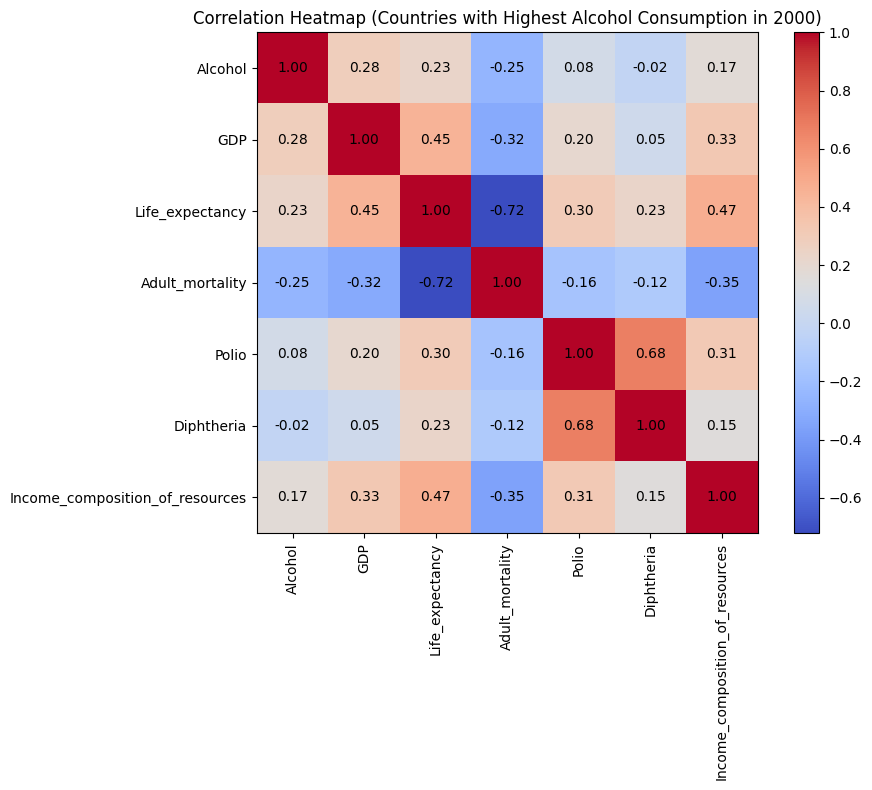

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the countries with the highest alcohol consumption
top_countries = df3_sorted.head(50)

# Select the relevant columns for the correlation analysis
features_corr = top_countries[['Alcohol', 'GDP', 'Life_expectancy', 'Adult_mortality', 'Polio', 'Diphtheria', 'Income_composition_of_resources']]

# Calculate the correlation matrix
correlation_matrix = features_corr.corr()

# Create the figure
plt.figure(figsize=(10, 8))

# Use imshow to display the heatmap
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')

# Add the labels (axes) for the columns and rows
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)

# Add a color bar on the right to indicate the scale
plt.colorbar()

# Add correlation values in the boxes
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# Add a title
plt.title('Correlation Heatmap (Countries with Highest Alcohol Consumption in 2000)')

# Display the figure
plt.tight_layout()
plt.show()


As a result, we can see that alcohol is correlated / linked to other parameters such as **Life expectancy** (which increases, as the richer people are, the best living condition they have so they live longer), **Adult mortality** (which decreases, which is rational) and **GDP** (which increases, as the richer people are, the more alcohol they can afford to buy).

Other parameters such as Polio and Diphtheria does not really have correlation with alcohol consumption, which is legitimate.

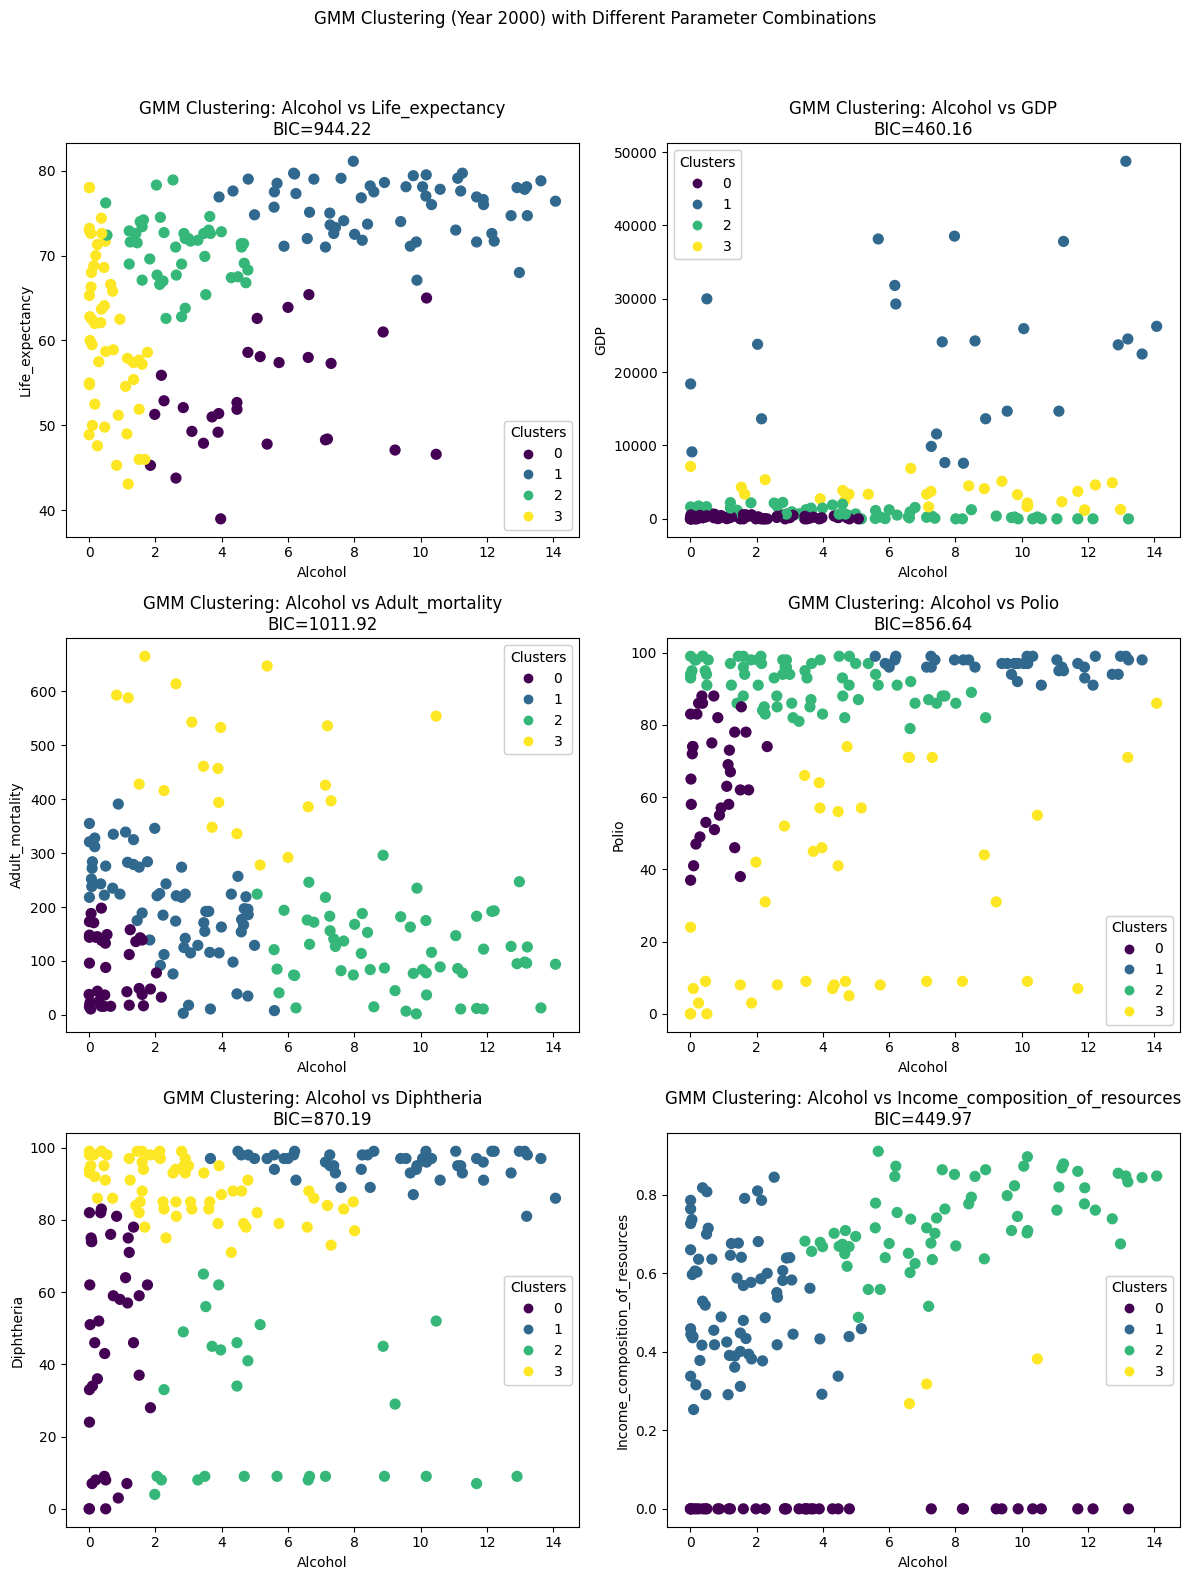

In [42]:
# Define the group of features we want to test
feature_combinations = [
    ['Alcohol', 'Life_expectancy'],
    ['Alcohol', 'GDP'],
    ['Alcohol', 'Adult_mortality'],
    ['Alcohol', 'Polio'],
    ['Alcohol', 'Diphtheria'],
    ['Alcohol', 'Income_composition_of_resources']
]

# Create a figure for subplots
n_rows = len(feature_combinations) // 2 + len(feature_combinations) % 2  # Number of rows needed
fig, axarr = plt.subplots(n_rows, 2, figsize=(12, n_rows * 5))

# Fit GMM and plot for each combination of features
for idx, (feature_x, feature_y) in enumerate(feature_combinations):
    # Select relevant features and fill NaN values
    features = df_2000[[feature_x, feature_y]].fillna(0)
    
    # Normalize the data
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    # Apply GMM with 4 components
    gmm = GaussianMixture(n_components=4, random_state=42).fit(features_scaled)
    
    # Predict clusters
    cluster_labels = gmm.predict(features_scaled)
    
    # Determine the subplot position
    ax = axarr[idx // 2, idx % 2] if n_rows > 1 else axarr[idx]
    
    # Plot the results
    scatter = ax.scatter(features[feature_x], features[feature_y], c=cluster_labels, s=50, cmap='viridis')
    ax.set_title(f"GMM Clustering: {feature_x} vs {feature_y}\nBIC={gmm.bic(features_scaled):.2f}")
    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)
    
    legend = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend)

# Adjust layout
plt.tight_layout()
plt.suptitle("GMM Clustering (Year 2000) with Different Parameter Combinations", y=1.05)
plt.show()


It does not return any relevant pattern. The study of correlation between the features is more relevant than this one. 

**QUESTION 3**

Which is the evolution trend in these countries between 2000 and 2015? Try to separate these different trends.

In [43]:
# Filter the data for the years 2000 and 2015
df_2000 = df[df['Year'] == 2000].set_index('Country')
df_2015 = df[df['Year'] == 2015].set_index('Country')

# Ensure both dataframes have the same countries for comparison
common_countries = df_2000.index.intersection(df_2015.index)
df_2000 = df_2000.loc[common_countries]
df_2015 = df_2015.loc[common_countries]

# Percentage change for selected features between 2000 and 2015
features = ['Alcohol', 'GDP', 'Life_expectancy', 'Adult_mortality']

# Compute the change
changes = df_2015[features] - df_2000[features]
percentage_changes = (df_2015[features] - df_2000[features]) / df_2000[features] * 100

print(changes)


                                    Alcohol          GDP  Life_expectancy  \
Country                                                                     
Afghanistan                            0.00   469.699210             10.2   
Albania                                0.94  2778.438849              5.2   
Algeria                                 NaN  2375.584950              4.3   
Angola                                  NaN  3140.496806              7.1   
Antigua and Barbuda                     NaN  3691.792364              2.8   
...                                     ...          ...              ...   
Venezuela (Bolivarian Republic of)      NaN          NaN              1.6   
Viet Nam                                NaN          NaN              2.6   
Yemen                                   NaN          NaN             -2.3   
Zambia                                  NaN   971.934021             18.0   
Zimbabwe                                NaN  -428.665048             21.0   

**QUESTION 4**

By selecting a specific country, can you explain a decrease or an increase through specific policies?